In [2]:
import itertools
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from scipy import interp
import matplotlib.pyplot as plt
import dataset_utils

In [16]:
def plot_roc(clf):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    for i in range(5):
        train, val, test = dataset_utils.divide_data('../rnaseq_scaled_symbols.csv', numpy=True, seed=i)
        X, y = train[:, 1:-1], train[:, -1].astype(int)
        X_test, y_test = test[:, 1:-1], test[:, -1].astype(int)

        probas_ = clf.fit(X, y).predict_proba(X_test)
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
def plot_confusion_matrix(clf, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    y_pred = clf.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    plt.figure()
    
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    plt.show()

## Metrics for Random Forest Classifier

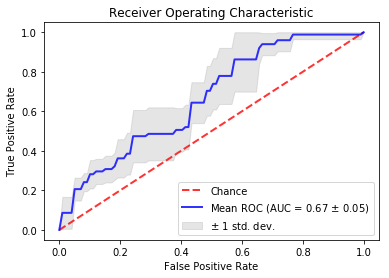

In [15]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=7)
plot_roc(clf)

In [20]:
train, val, test = dataset_utils.divide_data('../rnaseq_scaled_symbols.csv', numpy=True, seed=0)
X, y = train[:, 1:-1], train[:, -1].astype(int)
X_test, y_test = test[:, 1:-1], test[:, -1].astype(int)

clf.fit(X, y)
print("Drug Response:", sum(y_test)/float(len(y_test)))

Drug Response: 0.3225806451612903


Normalized confusion matrix
[[0.95 0.05]
 [1.   0.  ]]


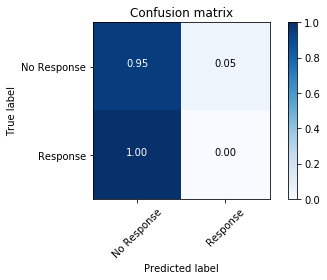

In [19]:
plot_confusion_matrix(clf, ['No Response', 'Response'])

In [21]:
print("Accuracy:", accuracy_score(y_test, clf.predict(X_test)))
print("Precision:", precision_score(y_test, clf.predict(X_test)))
print("Recall:", recall_score(y_test, clf.predict(X_test)))

Accuracy: 0.6451612903225806
Precision: 0.0
Recall: 0.0


## Metrics for SVM

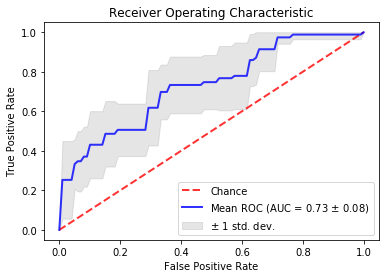

In [22]:
clf = SVC(gamma='auto', probability=True)
plot_roc(clf)

In [ ]:
clf.fit(X, y)
plot_confusion_matrix(clf, ['No Response', 'Response'])

In [ ]:
print("Accuracy:", accuracy_score(y_test, clf.predict(X_test)))
print("Precision:", precision_score(y_test, clf.predict(X_test)))
print("Recall:", recall_score(y_test, clf.predict(X_test)))